# TO DO List

- [ ] Define functions for library imports, data import setup and other EDA steps already finalized

# Library imports

** **

In [3]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import plotly.express as px
import scipy.stats as _stats
import datetime as dt
import itertools

from matplotlib import pyplot as plt
from IPython.core.display import display, HTML
from helper_functions import *

In [4]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    
    pd.options.display.max_columns = 200
    pd.options.display.max_rows = 200
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    
    sns.set()
    
    #warnings.filterwarnings("ignore")

In [5]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


/home/data-madness/Documents/SynologyDrive/Comunidade DS/Python do Zero ao DS/HouseSales-RecommendationSystem/houserocket_env/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['save']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


** **

# Data Import and Setup

** **

### Import data
** **

In [6]:
orig_df = pd.read_csv('data/kc_house_data.csv')
house_df = orig_df.copy(deep=True)

### General Info

** **

In [7]:
house_df.head()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000 221900.00         3       1.00         1180      5650    1.00           0     0          3      7        1180              0      1955             0    98178 47.51 -122.26           1340        5650
1  6414100192  20141209T000000 538000.00         3       2.25         2570      7242    2.00           0     0          3      7        2170            400      1951          1991    98125 47.72 -122.32           1690        7639
2  5631500400  20150225T000000 180000.00         2       1.00          770     10000    1.00           0     0          3      6         770              0      1933             0    98028 47.74 -122.23           2720        8062
3  2487200875  20141209T000000 604000.00         4       3.00         1960      5000    1.00           0     0          5      7        1050            910      1965             0    98136 47.52 -122.39           1360        5000
4  1954400510  20150218T000000 510000.00         3       2.00         1680      8080    1.00           0     0          3      8        1680              0      1987             0    98074 47.62 -122.05           1800        7503

In [8]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
house_df.describe().T

count          mean           std        min           25%           50%           75%           max
id            21613.00 4580301520.86 2876565571.31 1000102.00 2123049194.00 3904930410.00 7308900445.00 9900000190.00
price         21613.00     540088.14     367127.20   75000.00     321950.00     450000.00     645000.00    7700000.00
bedrooms      21613.00          3.37          0.93       0.00          3.00          3.00          4.00         33.00
bathrooms     21613.00          2.11          0.77       0.00          1.75          2.25          2.50          8.00
sqft_living   21613.00       2079.90        918.44     290.00       1427.00       1910.00       2550.00      13540.00
sqft_lot      21613.00      15106.97      41420.51     520.00       5040.00       7618.00      10688.00    1651359.00
floors        21613.00          1.49          0.54       1.00          1.00          1.50          2.00          3.50
waterfront    21613.00          0.01          0.09       0.00          0.00          0.00          0.00          1.00
view          21613.00          0.23          0.77       0.00          0.00          0.00          0.00          4.00
condition     21613.00          3.41          0.65       1.00          3.00          3.00          4.00          5.00
grade         21613.00          7.66          1.18       1.00          7.00          7.00          8.00         13.00
sqft_above    21613.00       1788.39        828.09     290.00       1190.00       1560.00       2210.00       9410.00
sqft_basement 21613.00        291.51        442.58       0.00          0.00          0.00        560.00       4820.00
yr_built      21613.00       1971.01         29.37    1900.00       1951.00       1975.00       1997.00       2015.00
yr_renovated  21613.00         84.40        401.68       0.00          0.00          0.00          0.00       2015.00
zipcode       21613.00      98077.94         53.51   98001.00      98033.00      98065.00      98118.00      98199.00
lat           21613.00         47.56          0.14      47.16         47.47         47.57         47.68         47.78
long          21613.00       -122.21          0.14    -122.52       -122.33       -122.23       -122.12       -121.31
sqft_living15 21613.00       1986.55        685.39     399.00       1490.00       1840.00       2360.00       6210.00
sqft_lot15    21613.00      12768.46      27304.18     651.00       5100.00       7620.00      10083.00     871200.00

** **

# 1. Exploratory Data Analysis
** **

### 1.1 Data Dimensionality
** **

It is a small sized dataset, and and it will not suffer from the curse of dimensionality.

In [10]:
print('Number of Rows:{}'.format(house_df.shape[0]))
print('Number of Columns {}'.format(house_df.shape[1]))

Number of Rows:21613
Number of Columns 21


### 1.2 Attributes Name and Description
** **

**id** - its a unique identifier number for each unique house

**date** - its the date when the house were sold

**price** - its the selling price when the house was sold

**bedrooms** - number of bedrooms in the house

**bathrooms** - number of bathrooms in the house, where a fraction like 0.25 represents a bathroom sink, shower or toilet

**sqft_living** - the size of the living room in square feet

**sqft_lot** - the size of the land in square feet

**floors** - number of floors in the house

**waterfront** - if there is a waterview from the house

**view** - how many views the house has

**condition** - the house preservation condition

**grade** - a rank from 1 to 13, which ranks the construction quality

**sqft_above** - the size of the house above the ground level in square feet

**sqft_basement** - the size of the house below the ground level in square feet

**yr_built** - the year the house was initially built

**yr_renovated** - the year of the house's last renovation

**zipcode** - what zipcode area the house is in

**lat** - Lattitude

**long** - Longitude

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors (possibly)

**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

** **

### 1.3 Attributes Type and Data type conversions
** **

In [11]:
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

>#### Date reformat type

Because it will be handled easily as a date variable type

In [12]:
house_df.date = pd.to_datetime(house_df.date)

In [13]:
house_df.date[0]

Timestamp('2014-10-13 00:00:00')

### 1.4 Attributes Descriptive Statistics (Summary Statistics)
** **

In [14]:
num_attributes = house_df.select_dtypes(include=['int64', 'float64'])

In [15]:
num_attributes.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [16]:
mean = pd.DataFrame(num_attributes.mean())
std = pd.DataFrame(num_attributes.std())
median = pd.DataFrame(num_attributes.median())

q1,q3 = pd.DataFrame(num_attributes.quantile([0.25])), pd.DataFrame(num_attributes.quantile([0.75]))

maximum = pd.DataFrame(num_attributes.max())
minimum = pd.DataFrame(num_attributes.min())

skew = pd.DataFrame(num_attributes.skew())
kurtosis = pd.DataFrame(num_attributes.kurtosis())

descriptive_statistics = pd.concat([mean,std,minimum,q1.transpose(),median,q3.transpose(),maximum,skew,kurtosis],axis=1)
descriptive_statistics.columns = ['mean','std','minimum','q1','median','q3','maximum','skew','kurtosis']
descriptive_statistics

mean           std    minimum            q1        median            q3       maximum  skew  kurtosis
id            4580301520.86 2876565571.31 1000102.00 2123049194.00 3904930410.00 7308900445.00 9900000190.00  0.24     -1.26
price             540088.14     367127.20   75000.00     321950.00     450000.00     645000.00    7700000.00  4.02     34.59
bedrooms               3.37          0.93       0.00          3.00          3.00          4.00         33.00  1.97     49.06
bathrooms              2.11          0.77       0.00          1.75          2.25          2.50          8.00  0.51      1.28
sqft_living         2079.90        918.44     290.00       1427.00       1910.00       2550.00      13540.00  1.47      5.24
sqft_lot           15106.97      41420.51     520.00       5040.00       7618.00      10688.00    1651359.00 13.06    285.08
floors                 1.49          0.54       1.00          1.00          1.50          2.00          3.50  0.62     -0.48
waterfront             0.01          0.09       0.00          0.00          0.00          0.00          1.00 11.39    127.63
view                   0.23          0.77       0.00          0.00          0.00          0.00          4.00  3.40     10.89
condition              3.41          0.65       1.00          3.00          3.00          4.00          5.00  1.03      0.53
grade                  7.66          1.18       1.00          7.00          7.00          8.00         13.00  0.77      1.19
sqft_above          1788.39        828.09     290.00       1190.00       1560.00       2210.00       9410.00  1.45      3.40
sqft_basement        291.51        442.58       0.00          0.00          0.00        560.00       4820.00  1.58      2.72
yr_built            1971.01         29.37    1900.00       1951.00       1975.00       1997.00       2015.00 -0.47     -0.66
yr_renovated          84.40        401.68       0.00          0.00          0.00          0.00       2015.00  4.55     18.70
zipcode            98077.94         53.51   98001.00      98033.00      98065.00      98118.00      98199.00  0.41     -0.85
lat                   47.56          0.14      47.16         47.47         47.57         47.68         47.78 -0.49     -0.68
long                -122.21          0.14    -122.52       -122.33       -122.23       -122.12       -121.31  0.89      1.05
sqft_living15       1986.55        685.39     399.00       1490.00       1840.00       2360.00       6210.00  1.11      1.60
sqft_lot15         12768.46      27304.18     651.00       5100.00       7620.00      10083.00     871200.00  9.51    150.76

### 1.5 Identify missing values and Duplicated records
***

>#### Missing Values

In [17]:
num_attributes.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
cat_attributes = house_df.select_dtypes(exclude=['int64','float64'])

pd.isna(cat_attributes).sum()

date    0
dtype: int64

>#### Check Duplicates (Houses sold twice or more times)

In [19]:
len(house_df['id'].unique())

21436

In [20]:
duplicated_ids = house_df['id'].apply(lambda x: True if (sum(x == house_df['id']) >= 2)\
                                                     else False)

Drop the duplicates but keep the most recent

In [21]:
house_df.loc[duplicated_ids,['id','date','price', 'yr_renovated','zipcode']].drop_duplicates(subset=['id'], keep='last')

id       date      price  yr_renovated  zipcode
94     6021501535 2014-12-23  700000.00             0    98117
314    4139480200 2014-12-09 1400000.00             0    98006
325    7520000520 2015-03-11  240500.00          1984    98146
346    3969300030 2014-12-29  239900.00             0    98178
372    2231500030 2015-03-24  530000.00             0    98133
718    8820903380 2015-01-02  730000.00          1990    98125
824     726049190 2015-02-18  431000.00             0    98133
837    8682262400 2015-05-13  419950.00             0    98053
1086   9834200885 2015-04-20  550000.00             0    98144
1129   8062900070 2015-02-13  369000.00             0    98056
1203   1231000510 2015-05-04  510000.00             0    98118
1235   6117501820 2015-04-28  435000.00             0    98166
1451   2228900270 2015-02-12  302000.00             0    98133
1465   3630120700 2015-01-07  765000.00             0    98029
1577   7888000390 2015-04-01  235000.00             0    98198
1865   2143700830 2015-03-12  370000.00             0    98055
2039   3395040550 2015-04-29  320000.00             0    98108
2127   4345000510 2015-04-28  325000.00             0    98030
2494   9407110710 2015-02-26  322000.00             0    98045
2497      1000102 2015-04-22  300000.00             0    98002
2503   1781500435 2015-02-25  575000.00             0    98126
2532   1232000810 2015-03-26  537000.00             0    98117
2565   7856400240 2015-02-11 1650000.00             0    98006
2632   7983000200 2015-02-25  250000.00             0    98003
2977   9136103130 2015-05-12  685000.00             0    98103
3034   5083000375 2015-03-19  235000.00             0    98198
3299   7409700215 2015-03-13  921500.00             0    98115
3541   1823049202 2015-01-07  326000.00             0    98146
3624   2767602141 2014-12-22  650000.00             0    98107
3757   1254200015 2015-04-08  625000.00             0    98117
3786    723049156 2014-11-12  284700.00             0    98146
3794   4435000705 2015-03-09  255500.00             0    98188
3879   4364700600 2015-03-30  390000.00             0    98126
3951   1825069031 2014-10-16  550000.00          1980    98074
4078   3262300940 2015-02-10  940000.00             0    98039
4343   9353300600 2015-03-26  370000.00             0    98059
4873   1524079093 2015-03-18  369500.00             0    98024
4923   9809000020 2015-03-13 1940000.00             0    98004
5245   3303000130 2015-04-28  520000.00             0    98177
5252   7524400250 2014-11-24  589950.00             0    98052
5273   4204400098 2015-04-21  385000.00             0    98055
5341   6632900574 2015-02-25  595000.00             0    98155
5593   2726049071 2015-04-08  489950.00             0    98125
5695   3578401060 2015-05-04  625000.00             0    98074
5724   1788800630 2015-02-25  185000.00             0    98023
5757   6381500170 2015-01-16  365000.00             0    98125
5759   1954420170 2014-11-13  580000.00             0    98074
5973   1545800290 2015-04-08  315000.00             0    98038
6346   9828200460 2015-01-06  430000.00             0    98122
6372   9222400605 2015-04-11  850000.00             0    98115
6435   8832900780 2015-04-08  647500.00             0    98028
6534   8645530010 2015-03-25  295000.00             0    98058
6631   3323059027 2015-02-25  340000.00             0    98058
6720   5417600130 2015-05-12  301000.00             0    98065
6790   8651510380 2014-12-16  539000.00             0    98074
6903   5249801440 2015-04-22  570000.00             0    98118
7179    526059224 2015-02-06  470000.00             0    98011
7246   1446403850 2015-01-14  212000.00             0    98168
7793    251300110 2015-01-14  358000.00             0    98003
7846   4139420590 2014-08-27 1200000.00             0    98006
7848   2621600015 2015-04-30  175000.00             0    98030
8012   2206700215 2015-04-22  550000.00             0    98006
8126   2787460720 2015-05-06  259950.00       

### 1.6 Data Granularity
***

>#### Geographic Data

The geographic data attributes *latitude* and *longitude* are in their finest granularity, but *zipcode* despite being in their purest from in terms of value, it could be transformed into other finer variables to describe specifically the location of the house, for example, the street or a more coarse one as county. 

>#### Temporal Data

The data attributes *yr_built* and *yr_renovated* are interval-based and nominal, respectively. And both have an year level of granularity. The *date* attribute can be considered as interval-based with a day level of temporal granularity

In [20]:
# house_df['yr_built'].sort_values().unique()

In [21]:
# house_df['yr_renovated'].sort_values().unique()

In [22]:
# house_df['date'].sort_values().unique()

>#### Numerical Data 

All numeric variables {'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15'}
      
have the finest granularity, they are not composed or discretized in any way.

### 1.7 Data Distribution
***

In [23]:
# values = num_attributes['sqft_living'].sort_values().values
# tuplex = plt.hist(values, 20, density=True)

In [24]:
# rows, cols = choose_grid(len(num_attributes.columns))

# iterate_through_data(num_attributes,num_attributes.columns,rows,cols)

In [25]:
# identify_best_fit_distribution(num_attributes,'price')

In [26]:
# identify_best_fit_distribution(num_attributes,'sqft_lot')

### 1.8 Data Sparsity
***

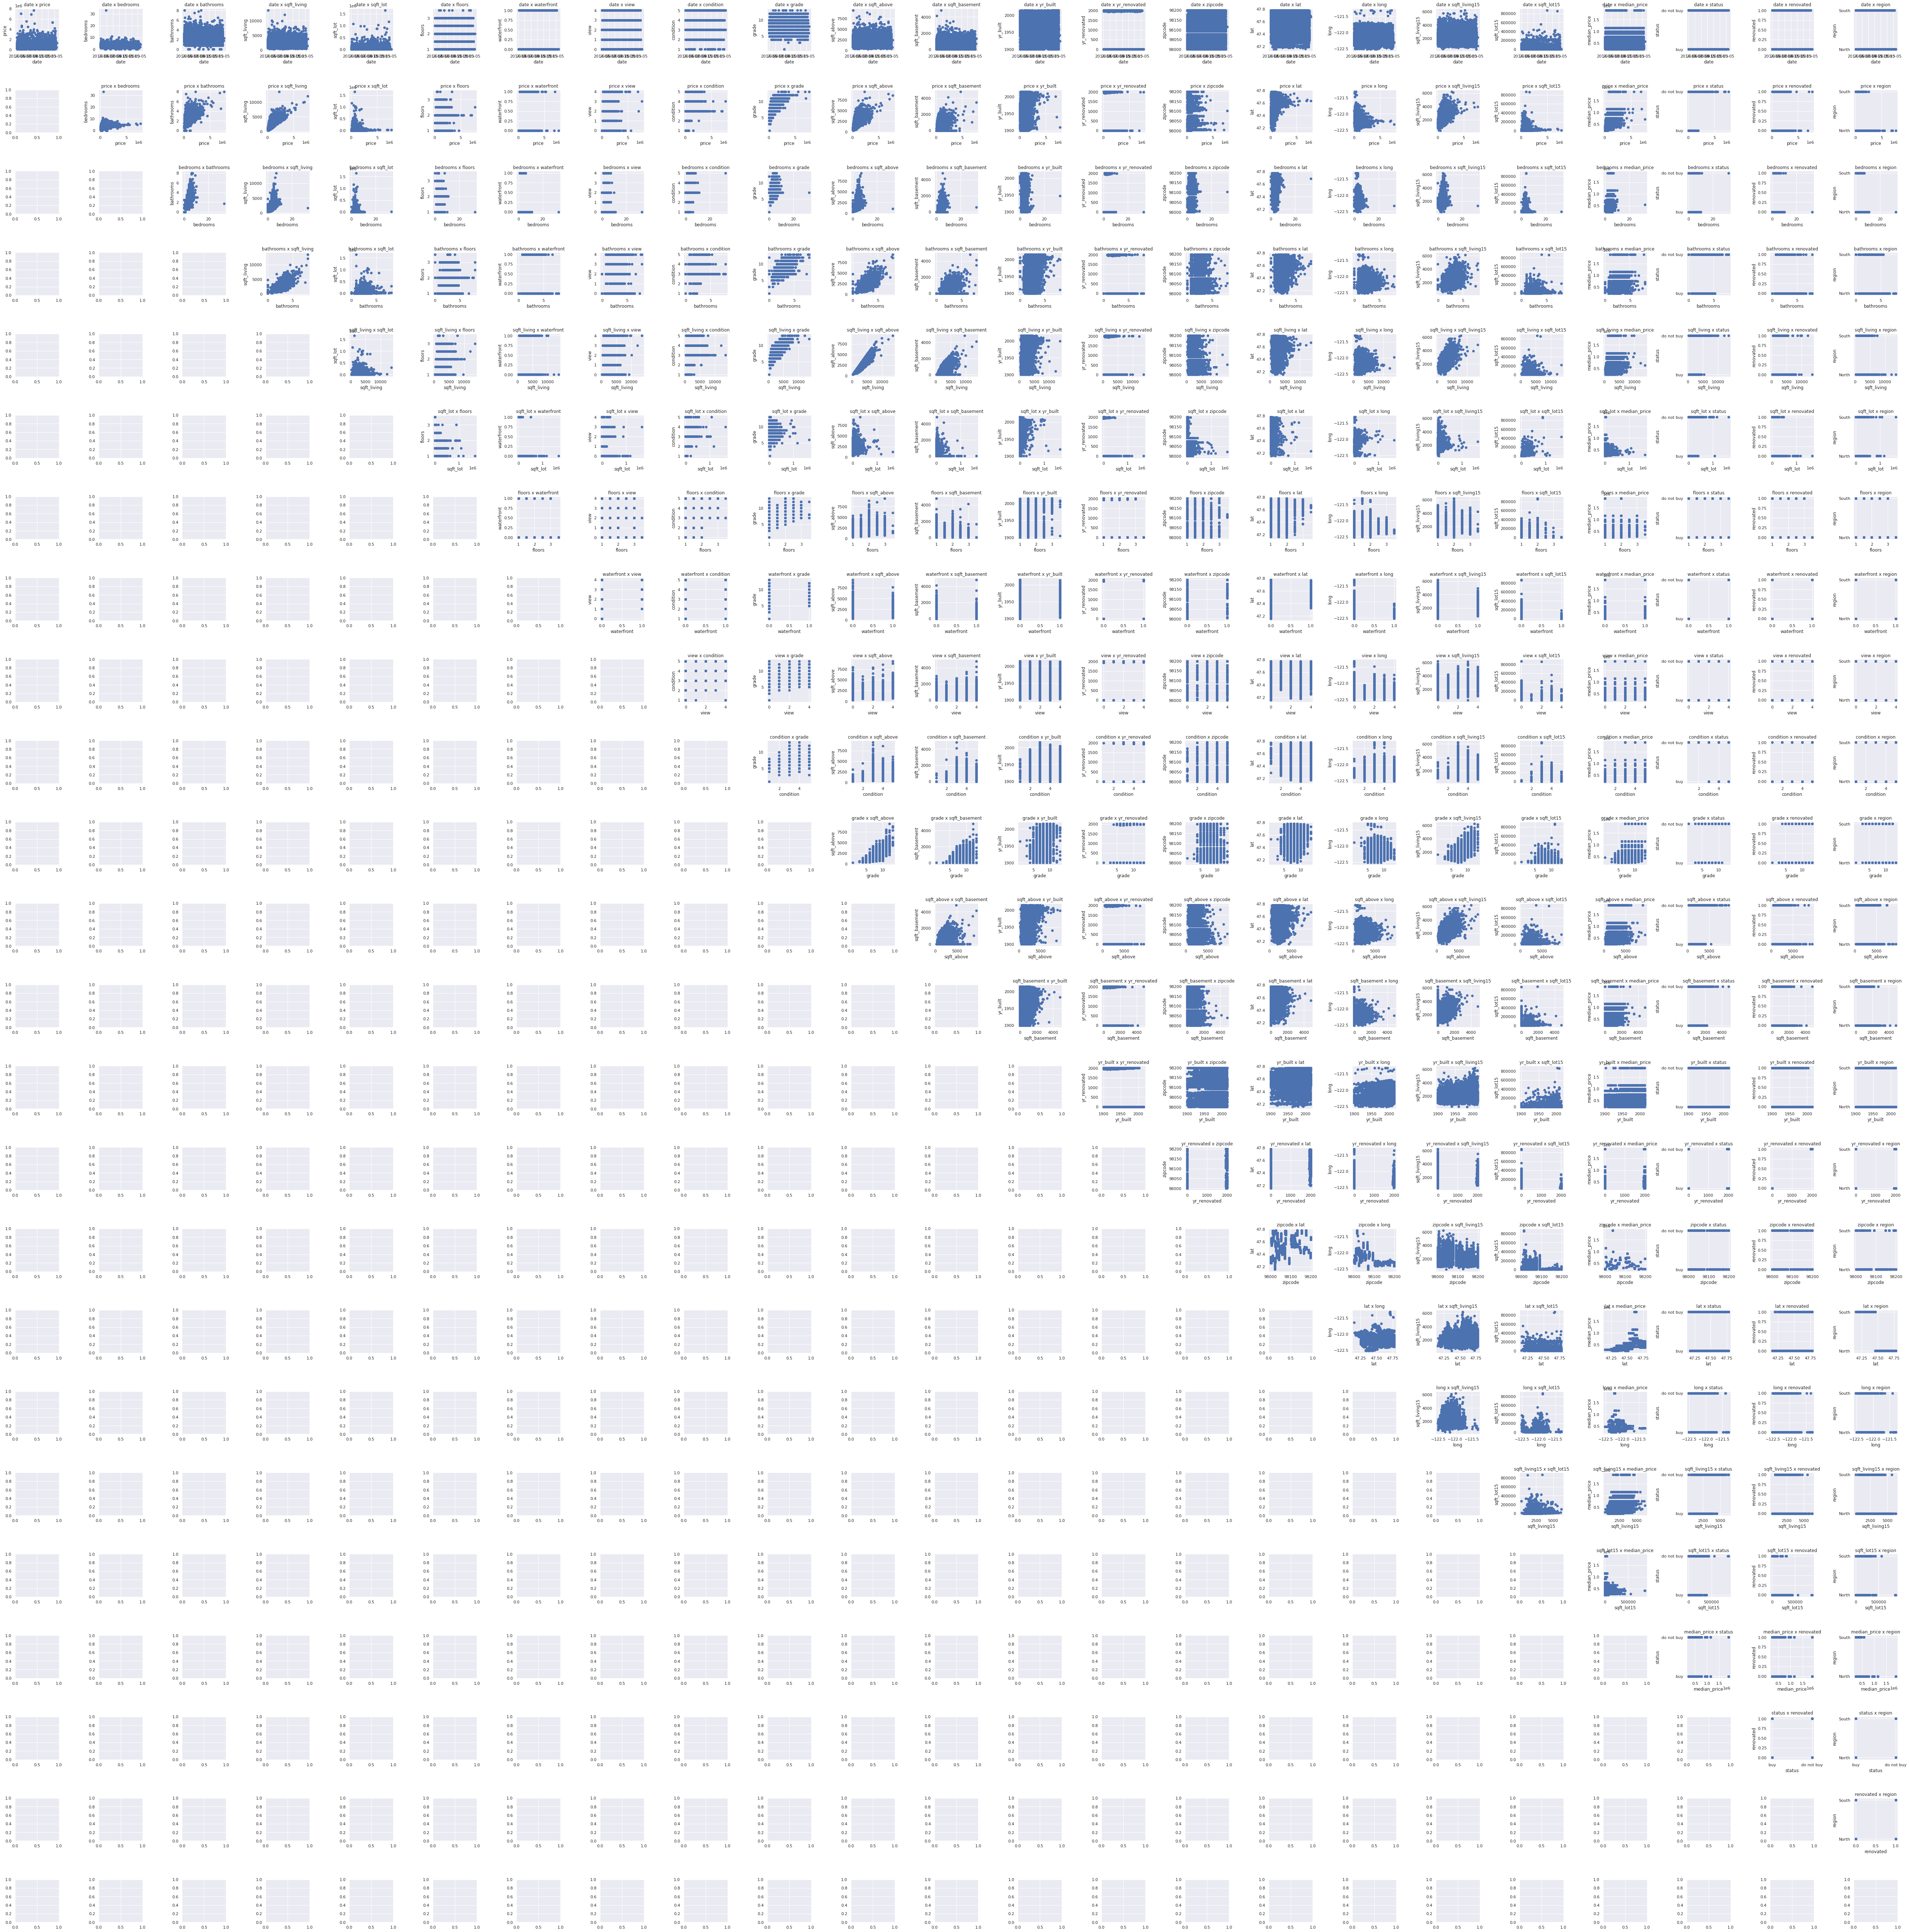

In [39]:
multiple_scatter_plots(house_df.loc[:, house_df.columns != 'id'])

> #### Correlation Analysis

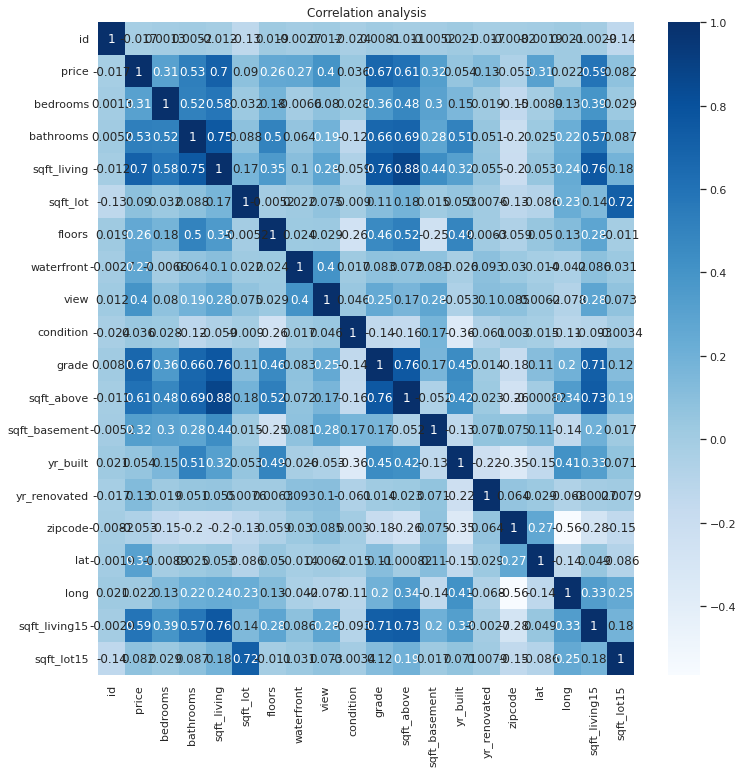

In [72]:
fig = plt.figure(figsize=[12, 12])
corr_mtx = num_attributes.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

> #### Outlier Analysis

In [65]:
# Outlier identification functions

def z_score(data, k_dev):
    mean = np.round(data.mean(), decimals=2)
    std_dev = np.round(data.std(), decimals=2)

    z_scores = [ (x - mean)/std_dev for x in data ]
    return data[(np.abs(z_scores) > k_dev)]

def modified_zscore(data, thresh):

    median = np.median(data)
    median_absolute_deviation = np.median([np.abs(x - median) for x in data])

    modified_z_scores = [0.6745 * (x - median) / median_absolute_deviation for x in data]
    return data[(np.abs(modified_z_scores) > thresh)]

def iqr(data, dist):
  
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    return data[(data < (Q1 - (dist * IQR))) | (data > (Q3 + (dist * IQR)))]

In [59]:
house_df.loc[:5, ~house_df.columns.isin(['id','date'])]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  median_price      status  renovated region
0 221900.00         3       1.00         1180      5650    1.00           0     0          3      7        1180              0      1955             0    98178 47.51 -122.26           1340        5650     278277.00         buy          0  North
1 205425.00         2       1.00          880      6780    1.00           0     0          4      6         880              0      1945             0    98178 47.50 -122.25           1190        6780     278277.00         buy          0  North
2 445000.00         3       2.25         2100      8201    1.00           0     2          3      8        1620            480      1967             0    98178 47.51 -122.24           2660        8712     278277.00  do not buy          0  North
3 236000.00         3       1.00         1300      5898    1.00           0     0          3      7        1300              0      1961             0    98178 47.51 -122.25           1320        7619     278277.00         buy          0  North
4 170000.00         2       1.00          860      5265    1.00           0     0          3      6         860              0      1931             0    98178 47.50 -122.27           1650        8775     278277.00         buy          0  North
5 245000.00         3       1.75         1740     11547    1.00           0     0          3      7        1740              0      1954             0    98178 47.49 -122.22            880       78408     278277.00         buy          0  North

In [66]:
outliers = {}
for feature in num_attributes.loc[:, ~num_attributes.columns.isin(['id','date'])].columns:
#     print(f"{feature} outliers", end="\n")
#     print(iqr(num_attributes[feature], 1.5))
    outliers[feature] = iqr(num_attributes[feature], 1.5)

In [69]:
outliers['bedrooms'].unique()

array([ 1,  6,  7,  0,  8,  9, 11, 10, 33])

### 1.9 Identify Data Inconsistency
***

Some inconsitent records or records with inconsistent values must be removed if they are not relevant outliers, because they will bias the analysis and future model training.

#### Inconsistent features values

1. bedrooms
    1. There are some houses with 0 bedrooms, but may be houses with no purpose of living.
    
    2. There is some house record with 33 bedrooms with only 1040 square feet of infraestructure size


2. bathrooms
    1. There are some houses with bathrooms variable with decimal places, like 1.75, that could be inconsistency, but it is assumed each 1 unit of bathroom is a complete bathroom with sink, shower or toilet, each one being 0.25.

3. yr_renovated
    1. 20699 records have the year renovated variable equal to 0

#### Inconsistent records




In [28]:
house_df.loc[house_df_fs['bedrooms'] == 0]

id       date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15
875    6306400140 2014-06-12 1095000.00         0       0.00         3064      4764    3.50           0     2          3      7        3064              0      1990             0    98102 47.64 -122.32           2360        4000
3119   3918400017 2015-02-05  380000.00         0       0.00         1470       979    3.00           0     2          3      8        1470              0      2006             0    98133 47.71 -122.36           1470        1399
3467   1453602309 2014-08-05  288000.00         0       1.50         1430      1650    3.00           0     0          3      7        1430              0      1999             0    98125 47.72 -122.29           1430        1650
4868   6896300380 2014-10-02  228000.00         0       1.00          390      5900    1.00           0     0          2      4         390              0      1953             0    98118 47.53 -122.26           2170        6000
6994   2954400190 2014-06-24 1295650.00         0       0.00         4810     28008    2.00           0     0          3     12        4810              0      1990             0    98053 47.66 -122.07           4740       35061
8477   2569500210 2014-11-17  339950.00         0       2.50         2290      8319    2.00           0     0          3      8        2290              0      1985             0    98042 47.35 -122.15           2500        8751
8484   2310060040 2014-09-25  240000.00         0       2.50         1810      5669    2.00           0     0          3      7        1810              0      2003             0    98038 47.35 -122.05           1810        5685
9773   3374500520 2015-04-29  355000.00         0       0.00         2460      8049    2.00           0     0          3      8        2460              0      1990             0    98031 47.41 -122.17           2520        8050
9854   7849202190 2014-12-23  235000.00         0       0.00         1470      4800    2.00           0     0          3      7        1470              0      1996             0    98065 47.53 -121.83           1060        7200
12653  7849202299 2015-02-18  320000.00         0       2.50         1490      7111    2.00           0     0          3      7        1490              0      1999             0    98065 47.53 -121.83           1500        4675
14423  9543000205 2015-04-13  139950.00         0       0.00          844      4269    1.00           0     0          4      7         844              0      1913             0    98001 47.28 -122.25           1380        9600
18379  1222029077 2014-10-29  265000.00         0       0.75          384    213444    1.00           0     0          3      4         384              0      2003             0    98070 47.42 -122.49           1920      224341
19452  3980300371 2014-09-26  142000.00         0       0.00          290     20875    1.00           0     0          1      1         290              0      1963             0    98024 47.53 -121.89           1620       22850

In [29]:
house_df.loc[house_df_fs['bedrooms'] == 33]

id       date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15
15870  2402100895 2014-06-25 640000.00        33       1.75         1620      6000    1.00           0     0          5      7        1040            580      1947             0    98103 47.69 -122.33           1330        4700

In [32]:
house_df.yr_renovated.sort_values().unique()

array([   0, 1934, 1940, 1944, 1945, 1946, 1948, 1950, 1951, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015])

In [34]:
len(house_df.loc[house_df['yr_renovated'] == 0])

20699

### 1.10 Business Data Assumptions
***

It is important to do some business data assumption to better analyze the data and take interpretable insights.

1. **Region granularity**

    There is some difference between sub-regions in King County, so there must be a separation between regions, and have a specific analysis for each. Since a generalized analysis would nullify the correlation of each region, and would be harder to take insights. This region segmentation can be made in different granularities, that is it can be divided by North, South, and East Mountains, but it can also have a finer granularity that is for zipcode regions. Another finer granularity can be the street or street block by collecting that data from the latitude and longitude, and counting the number of houses per region to assess if there is enough data for each street to get significant statistical data.


2. **Bedrooms inconsistency**

    Houses with 0 bedrooms, may be for other purposes apart from living usage. (Confirm all records consistency, analysing one by one or doing some summary statistics)
    
3. **Year Renovated inconsistency**

    It can be assumed that houses with value 0 on yr_renovated is basically houses that have not been renovated yet.

### 1.11 Set new business hypothesis
***

1. Houses that have a water view, are 20% more expensive on average.


2. Houses with year built older than 1955, are 50% cheaper on average.


3. Houses without basement are 40% bigger than with basement.


4. The growth rate of the houses price YoY (Year over Year) is 10%.


5. Houses with 3 bathrooms have a MoM (Month over Month) growth of 15%.


6. Houses in the mountains are valued 10% more in the Summer than in the Winter.

### 1.12 Attributes Usefulness for the tasks
***

First intuition without looking to EDA, and only based on the business understanding. (On the second cycle will be based on the EDA) 

**Business:** Buy and sell houses in Real Estate market, with some profit.

**Business problems:**

    1. Which houses should be bought and for what price?
    
    2. Once its bought when it's the best time period to sell it and for what price?

    3. To rise the housing selling price, the company should do a renovation. So what would be good renewal changes?

    This tasks can easily be done as a Classification Task, after doing the labelling task of giving a label to each record, telling if the house should be bought or not. This labelling process comes with some business assumptions of good profit values and empirical rules, and by doing a preliminary analysis we get our first actionable insights that will be presented to business experts. After validating this labelling empirical process, we can train a classification model, to make the decision-making more robust and less biased by the history.
    
    Useful Attributes for business question:
    
    1. date, price, condition, grade, zipcode
    2. date, price, condition, grade, zipcode
    3. date, price, bedrooms, bathrooms, sqft_living, sqft_above

### 1.13 Feature Selection
***

In [22]:
house_df_fs = house_df[['date','price','condition','grade','zipcode','bedrooms','bathrooms','sqft_living','sqft_above']]

### 1.14 Feature engineering and derivation (Identify extra useful features based on solution planning)
***

(Check planning document)

Useful Attributes for business question:
    
    1. date, price, condition, grade, zipcode, plus:
        1. median_price - based on zipcode region of the selected houses
        2. percentage_value_below_median
    2. From the selected houses to buy create and use:
        1. best_season - based on zipcode region of the selected houses, and its selling date
        2. selling_price - based on the price and the season
        3. profit - will result from difference between selling_price and price 
    3. From the selected houses to buy create and use:
        1.
        2. 

## 2. Find Insights

### 2.1 Test Business Hypothesis
***

### 2.2 House Recommendation report (Answers to Business questions)

#### Business Hypothesis
***

**1.** The houses that have a price value lower than the median and are in good conditions, can be sold for a higher price, so are good to buy.
    
    
**2.** The houses that have a price value lower than the median and are in bad conditions, cannot be sold for a higher price, so are not good to buy.

**3.** The houses that have a price value higher than the median, independently from the condition, are not good to buy and take profit.


In [33]:
house_df['status'] = house_df[['price','condition','median_price']].apply(lambda x: 'buy' if (x[0] < x[2]) & (x[1] >= 3)\
                                                                          else 'do not buy',  axis = 1)

In [34]:
house_df[['id','zipcode','price','median_price','condition','status']].head()

id  zipcode     price  median_price  condition      status
0  7129300520    98178 221900.00     278277.00          3         buy
1  4060000240    98178 205425.00     278277.00          4         buy
2  4058801670    98178 445000.00     278277.00          3  do not buy
3  2976800796    98178 236000.00     278277.00          3         buy
4  6874200960    98178 170000.00     278277.00          3         buy

In [35]:
house_df['renovated'] = house_df['yr_renovated'].apply(lambda x: 1 if x!=0 else 0)
house_df['renovated'].value_counts()

0    20699
1      914
Name: renovated, dtype: int64

In [36]:
house_df['region'] = house_df['lat'].apply(lambda x: 'North' if x > 47.46 else 'South')

sampleNorth = house_df[house_df['region'] == 'North'].sample(100)
sampleSouth = house_df[house_df['region'] == 'South'].sample(100)

house_df_sampled = pd.concat([sampleNorth,sampleSouth])

house_df_sampled['price_cube'] = house_df_sampled['price']**1.5

In [37]:
data_map = house_df_sampled[['id','zipcode', 'lat', 'long', 'price','bedrooms','renovated','region','price_cube']]

map = px.scatter_mapbox(data_map, lat='lat', lon='long',
                       hover_name='id',
                       hover_data=['price'],
                       size= 'price_cube',
                       color='region',
                       color_discrete_sequence=['red','green'],
                       size_max=30,
                       zoom=10,
                       height=300)

map.update_layout(mapbox_style='open-street-map')
map.update_layout(height=600, margin={'r':0, 't':0, 'l':0, 'b':0})

map.show()

#### Which houses should be bought and for what price?

In [29]:
zipcode_median = house_df[['price', 'zipcode']].groupby('zipcode').median().reset_index()
zipcode_median.columns = ['zipcode','median_price']

In [30]:
house_df = pd.merge(house_df,zipcode_median,on='zipcode',how='inner')

In [31]:
house_df.head()

id       date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  median_price
0  7129300520 2014-10-13 221900.00         3       1.00         1180      5650    1.00           0     0          3      7        1180              0      1955             0    98178 47.51 -122.26           1340        5650     278277.00
1  4060000240 2014-06-23 205425.00         2       1.00          880      6780    1.00           0     0          4      6         880              0      1945             0    98178 47.50 -122.25           1190        6780     278277.00
2  4058801670 2014-07-17 445000.00         3       2.25         2100      8201    1.00           0     2          3      8        1620            480      1967             0    98178 47.51 -122.24           2660        8712     278277.00
3  2976800796 2014-09-25 236000.00         3       1.00         1300      5898    1.00           0     0          3      7        1300              0      1961             0    98178 47.51 -122.25           1320        7619     278277.00
4  6874200960 2015-02-27 170000.00         2       1.00          860      5265    1.00           0     0          3      6         860              0      1931             0    98178 47.50 -122.27           1650        8775     278277.00

In [32]:
house_df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64